# Stepsizes for Transforms

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.colors as colors
from hankel import HankelTransform

from scipy.special import k0,gamma

In [2]:
hgrid = np.logspace(-4,0,50)
Ngrid = np.arange(50,1050,50)

In [10]:
def imshow_plots(res,errs):
    plt.imshow(np.abs(res.T),origin="lower",aspect="auto",cmap='viridis',extent=[np.log10(hgrid[0]),np.log10(hgrid[-1]),Ngrid[0],Ngrid[-1]],
               norm = colors.LogNorm())

    
    plt.xlabel(r"$\log_{10} h$")
    plt.ylabel(r"$N$")
    plt.colorbar()
    plt.contour(np.abs(res.T), [1e-5,1e-3,1e-2],
             origin='lower',
             linewidths=2,
             extent=[np.log10(hgrid[0]),np.log10(hgrid[-1]),Ngrid[0],Ngrid[-1]],aspect="auto")
    #plt.xscale('log')
    plt.show()
    plt.imshow(np.abs(errs.T),origin="lower",aspect="auto",cmap='viridis',extent=[hgrid[0],hgrid[-1],Ngrid[0],Ngrid[-1]],
               norm = colors.LogNorm())
    plt.xscale('log')
    plt.xlabel(r"$h$")
    plt.ylabel(r"$N$")
    plt.colorbar()
    plt.show()
    
def analyse(f,anl,k,nu=0):
    res = np.zeros((len(hgrid),len(Ngrid)))
    errs = np.zeros((len(hgrid),len(Ngrid)))
    for ih,h in enumerate(hgrid):
        for iN, N in enumerate(Ngrid):
            ht = HankelTransform(nu=nu, N=N, h=h)
            ans, errs[ih,iN] = ht.transform(f,k)
            res[ih,iN] = ans/anl -1
            errs /= anl
    return res,errs

## Powerlaws

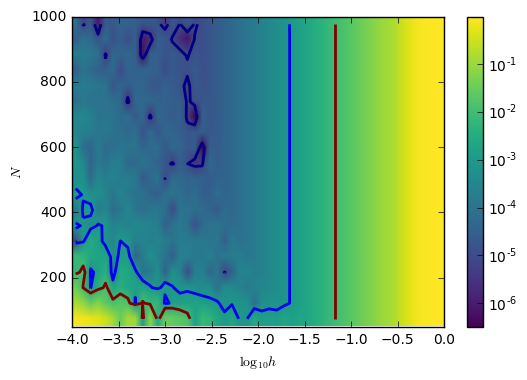

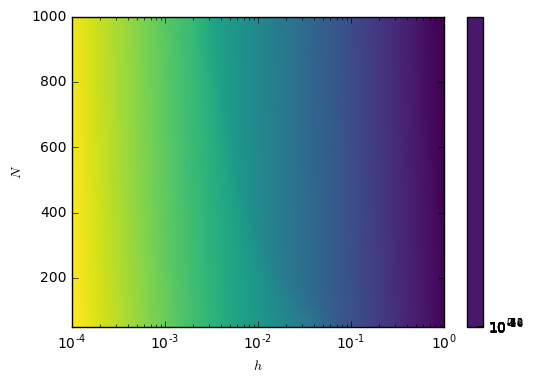

In [12]:
s = -2.
nu = 2.
k = 0.01

f = lambda x : x**s
anl = 2**(s+1) * gamma(0.5*(2+nu+s))/k**(s+2)/gamma(0.5*(nu-s))

res,errs = analyse(f,anl,k,nu)
imshow_plots(res,errs)

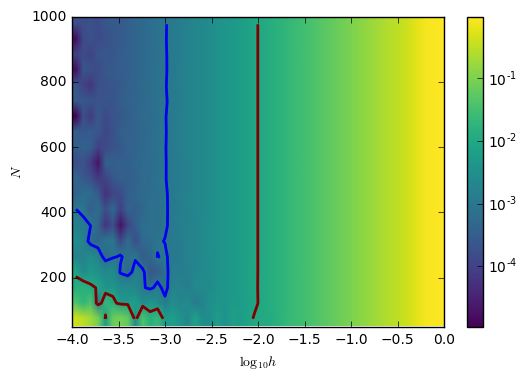

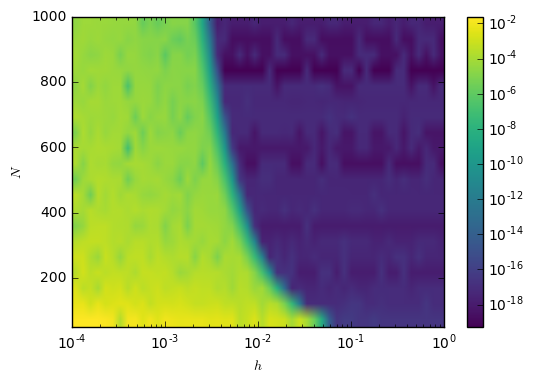

In [13]:
s = -2.
nu = 1.
k = 0.01

f = lambda x : x**s
anl = 2**(s+1) * gamma(0.5*(2+nu+s))/k**(s+2)/gamma(0.5*(nu-s))

res,errs = analyse(f,anl,k,nu)
imshow_plots(res,errs)

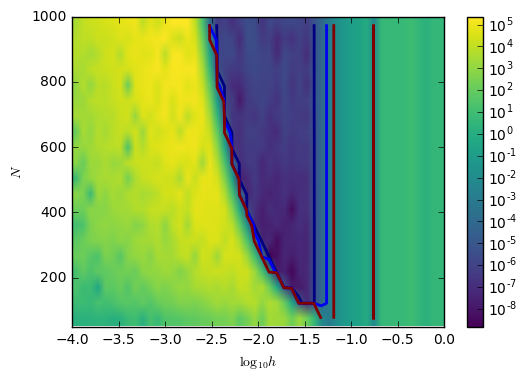

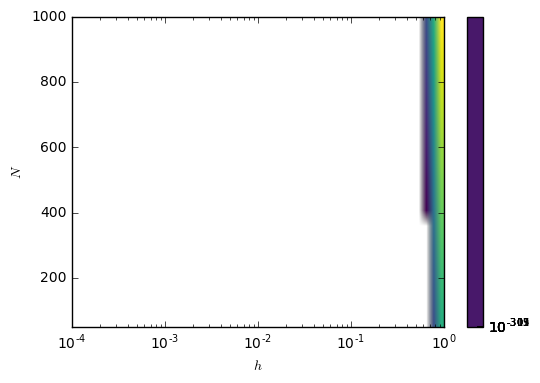

In [14]:
s = 1.
nu = 0
k = 0.01

f = lambda x : x**s
anl = 2**(s+1) * gamma(0.5*(2+nu+s))/k**(s+2)/gamma(0.5*(nu-s))

res,errs = analyse(f,anl,k,nu)
imshow_plots(res,errs)

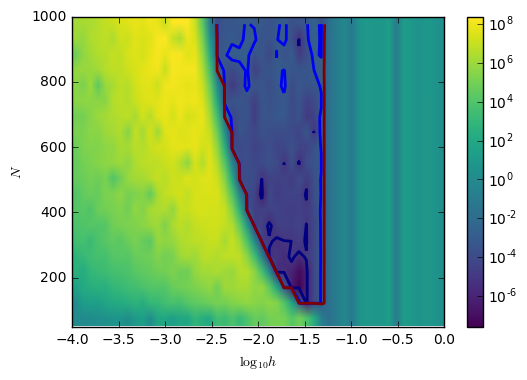

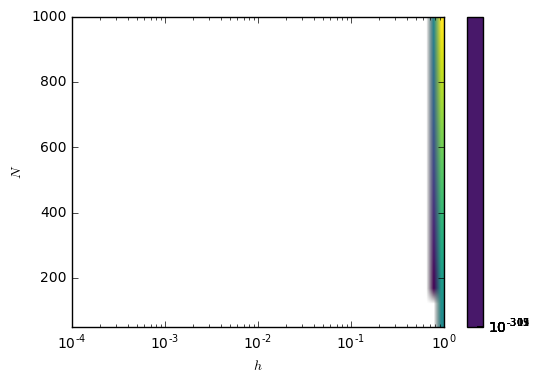

In [15]:
s = 2.
nu = 1.
k = 0.01

f = lambda x : x**s
anl = 2**(s+1) * gamma(0.5*(2+nu+s))/k**(s+2)/gamma(0.5*(nu-s))

res,errs = analyse(f,anl,k,nu)
imshow_plots(res,errs)